<a href="https://colab.research.google.com/github/PRIMODIALNYXAlpha/Cancer_internship_ybi_py/blob/main/cancer_ybi_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
url = 'https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv'
cancer = pd.read_csv(url)

In [ ]:
print("First 5 Rows of the Data:")
print(cancer.head())

print("\nData Info:")
print(cancer.info())

print("\nData Description:")
print(cancer.describe())

First 5 Rows of the Data:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_wor

In [ ]:
print("Missing Values in Each Column:")
print(cancer.isnull().sum())

Missing Values in Each Column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_

In [ ]:
cancer = cancer.drop(['id', 'Unnamed: 32'], axis=1)

In [ ]:
y = cancer['diagnosis']
X = cancer.drop('diagnosis', axis=1)

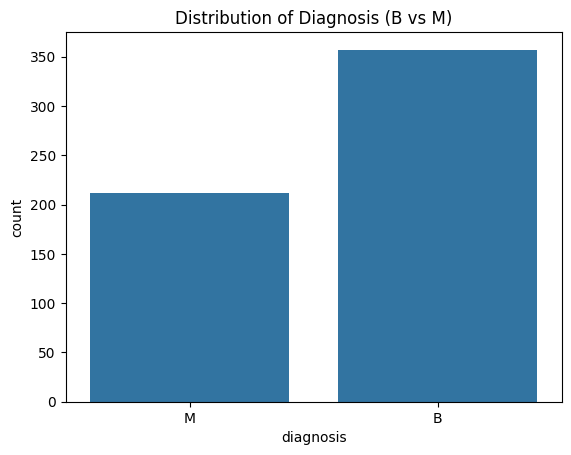

In [ ]:
sns.countplot(x='diagnosis', data=cancer)
plt.title("Distribution of Diagnosis (B vs M)")
plt.show()

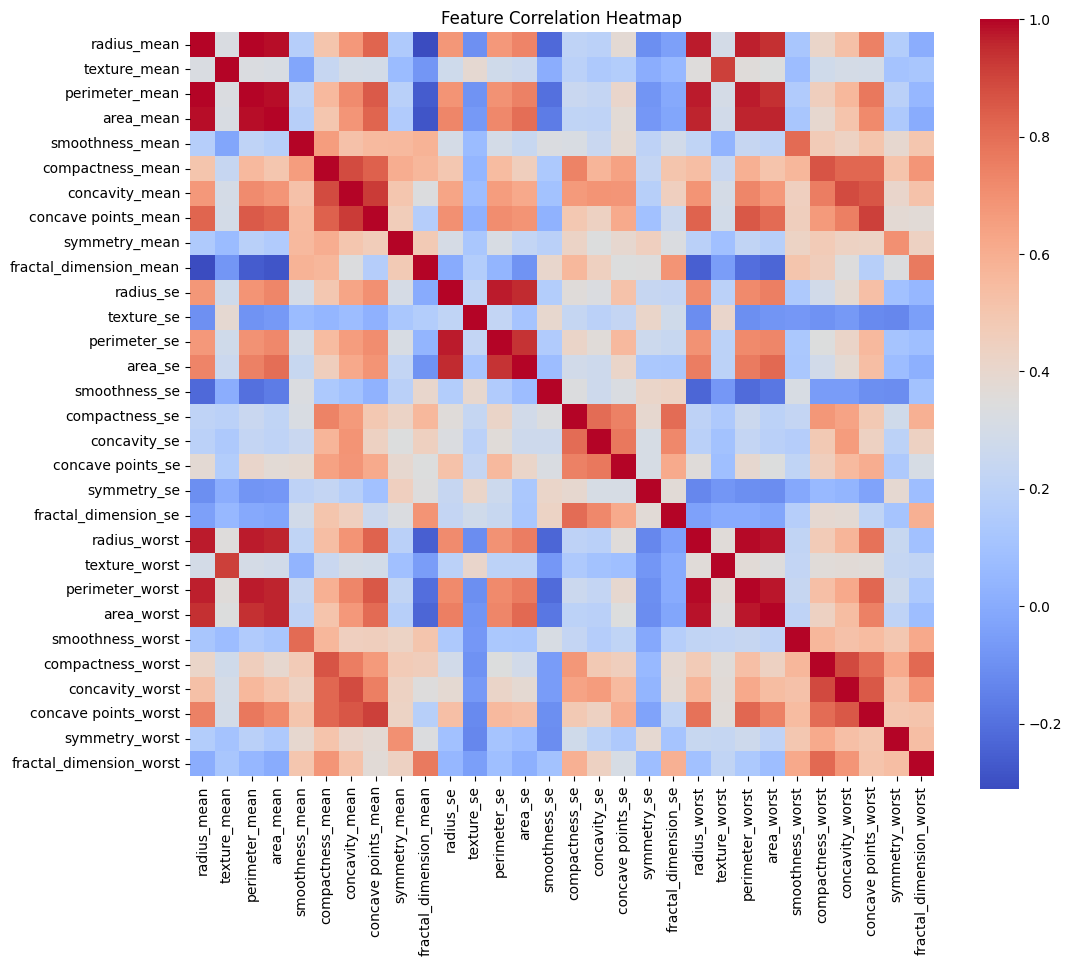

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cancer.drop('diagnosis', axis=1).corr(), cmap='coolwarm', square=True, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (398, 30)
Testing Set Shape: (171, 30)


In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[97  5]
 [ 2 67]]

Accuracy Score: 0.9590643274853801

Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.95      0.97       102
           M       0.93      0.97      0.95        69

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison_df.head(10))

  Actual Predicted
0      B         B
1      M         M
2      M         M
3      B         B
4      M         M
5      B         B
6      M         M
7      B         B
8      M         M
9      B         B


In [ ]:
print("✅ Logistic Regression achieved {:.2f}% accuracy.".format(accuracy_score(y_test, y_pred)*100))
print("✅ The model performs well in classifying benign and malignant cases.")

✅ Logistic Regression achieved 95.91% accuracy.
✅ The model performs well in classifying benign and malignant cases.
